# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Preprocessing
from sklearn.model_selection import train_test_split, learning_curve
# Classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from xgboost import XGBClassifier
# Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
df = pd.read_csv("df_clus.csv")

In [3]:
print(df.head())

   TransactionAmount  CustomerAge  CustomerOccupation  TransactionDuration  \
0           0.015317           70                   0             0.244828   
1           0.416400           68                   0             0.451724   
2           0.139579           19                   3             0.158621   
3           0.204047           26                   3             0.051724   
4           0.014608           26                   3             0.648276   

   LoginAttempts  AccountBalance  TransactionType_Debit  Channel_Branch  \
0            0.0        0.336832                   True           False   
1            0.0        0.918055                   True           False   
2            0.0        0.068637                   True           False   
3            0.0        0.569198                   True           False   
4            0.0        0.492591                  False           False   

   Channel_Online  Cluster  FraudLabel  
0           False        0           0 

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [4]:
print(df.columns)

Index(['TransactionAmount', 'CustomerAge', 'CustomerOccupation',
       'TransactionDuration', 'LoginAttempts', 'AccountBalance',
       'TransactionType_Debit', 'Channel_Branch', 'Channel_Online', 'Cluster',
       'FraudLabel'],
      dtype='object')


In [5]:
# Pisahkan fitur (X) dan label (y)
X = df.drop(columns=['FraudLabel', 'Cluster'])  # Gunakan semua fitur termasuk Cluster
y = df['FraudLabel']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [6]:
print(X_train.columns)
print(X_test.columns)

Index(['TransactionAmount', 'CustomerAge', 'CustomerOccupation',
       'TransactionDuration', 'LoginAttempts', 'AccountBalance',
       'TransactionType_Debit', 'Channel_Branch', 'Channel_Online'],
      dtype='object')
Index(['TransactionAmount', 'CustomerAge', 'CustomerOccupation',
       'TransactionDuration', 'LoginAttempts', 'AccountBalance',
       'TransactionType_Debit', 'Channel_Branch', 'Channel_Online'],
      dtype='object')


In [7]:
# Cek distribusi data setelah split
print("Distribusi label di training set:")
print(y_train.value_counts(normalize=True))
print("Distribusi label di testing set:")
print(y_test.value_counts(normalize=True))

Distribusi label di training set:
FraudLabel
0    0.810959
1    0.189041
Name: proportion, dtype: float64
Distribusi label di testing set:
FraudLabel
0    0.811816
1    0.188184
Name: proportion, dtype: float64


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [8]:
# Membangun model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [9]:
# Membangun model XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

C:\Users\TUF Gaming\miniconda3\envs\myenv\lib\site-packages\xgboost\training.py:183: UserWarning: [00:15:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [10]:
# Membangun model SVM
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

### Penjelasan algoritma yang digunakan.

1. **Random Forest Classifier**
Random Forest adalah algoritma ensemble berbasis Decision Tree, yang bekerja dengan:
a. Membuat banyak Decision Tree secara acak menggunakan subset data yang berbeda.
b. Menggabungkan hasil dari semua pohon keputusan melalui mekanisme voting untuk menentukan prediksi akhir.
**Keunggulan:**
- Mampu menangani data kategorikal dan numerik.
- Tidak mudah overfitting karena menggunakan banyak pohon keputusan.
**Kelemahan:**
- Memerlukan waktu komputasi lebih lama dibanding algoritma lain seperti XGBoost.
- Kurang efisien untuk dataset yang sangat besar.

2. **XGBoost (Extreme Gradient Boosting)**
XGBoost adalah algoritma berbasis Boosting yang meningkatkan performa dengan menggabungkan banyak model sederhana secara bertahap. Cara kerjanya:
a. Membuat model pertama, kemudian mengevaluasi kesalahan prediksi.
b. Model berikutnya dibuat untuk memperbaiki kesalahan model sebelumnya.
c. Proses ini berulang hingga model menjadi optimal.
**Keunggulan:**
- Lebih cepat dan efisien dibanding Random Forest.
- Mampu menangani dataset besar dan data yang tidak seimbang.
**Kelemahan:**
- Membutuhkan tuning parameter yang lebih kompleks untuk mendapatkan performa terbaik.

c. Support Vector Machine (SVM)
SVM adalah algoritma berbasis hyperplane yang digunakan untuk memisahkan dua kelas dalam data. Cara kerjanya:
a. Mencari hyperplane optimal yang memisahkan data dengan margin terbesar.
b. Menggunakan kernel trick untuk menangani data yang tidak dapat dipisahkan secara linear.
**Keunggulan:**
- Cocok untuk dataset dengan dimensi tinggi.
- Dapat memberikan hasil yang baik meskipun dengan jumlah data terbatas.
**Kelemahan:**
- Kurang efisien untuk dataset besar karena waktu komputasi yang lama.
- Memerlukan tuning parameter seperti C dan kernel untuk mendapatkan hasil terbaik.

## **b. Evaluasi Model Klasifikasi**

In [11]:
# Evaluasi model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
print(f"Random Forest - Accuracy: {accuracy_rf:.4f}")
print(f"Random Forest - F1 Score: {f1_rf:.4f}")
print(classification_report(y_test, y_pred_rf))

Random Forest - Accuracy: 1.0000
Random Forest - F1 Score: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       371
           1       1.00      1.00      1.00        86

    accuracy                           1.00       457
   macro avg       1.00      1.00      1.00       457
weighted avg       1.00      1.00      1.00       457



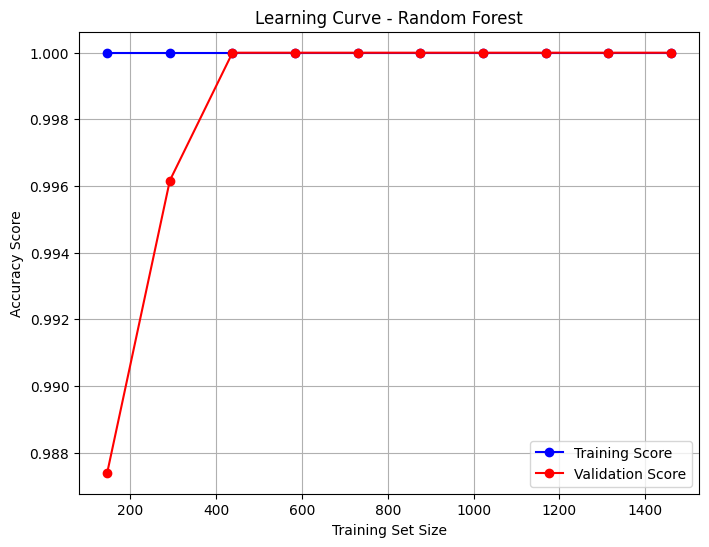

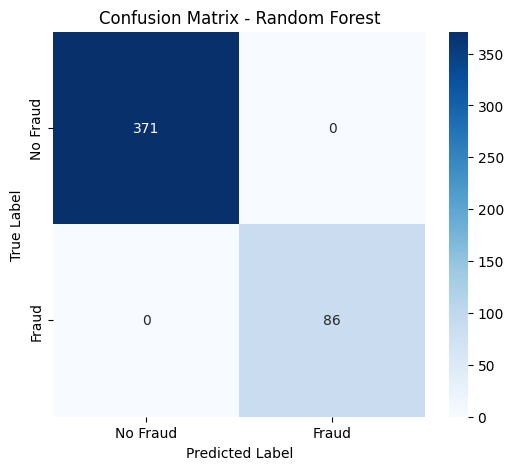

In [12]:
# Visualisasi Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    rf_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Training Score", color="blue", marker="o")
plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Validation Score", color="red", marker="o")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.title("Learning Curve - Random Forest")
plt.legend()
plt.grid()
plt.show()

# Visualisasi Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest")
plt.show()

XGBoost - Accuracy: 1.0000
XGBoost - F1 Score: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       371
           1       1.00      1.00      1.00        86

    accuracy                           1.00       457
   macro avg       1.00      1.00      1.00       457
weighted avg       1.00      1.00      1.00       457



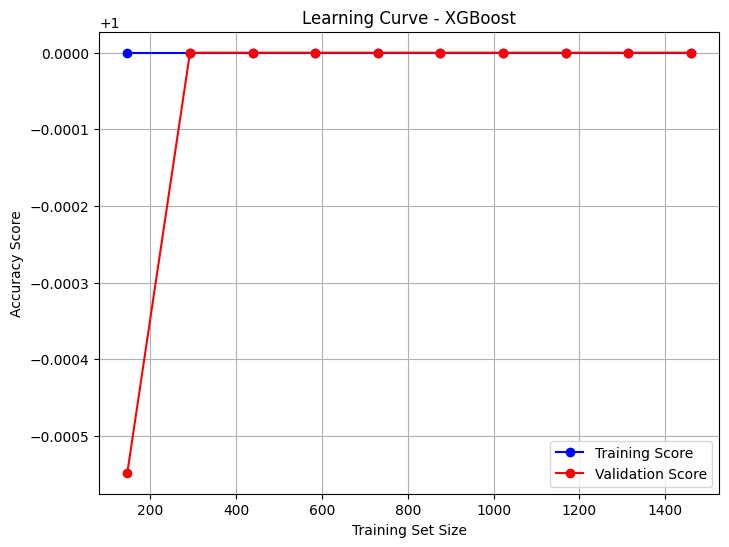

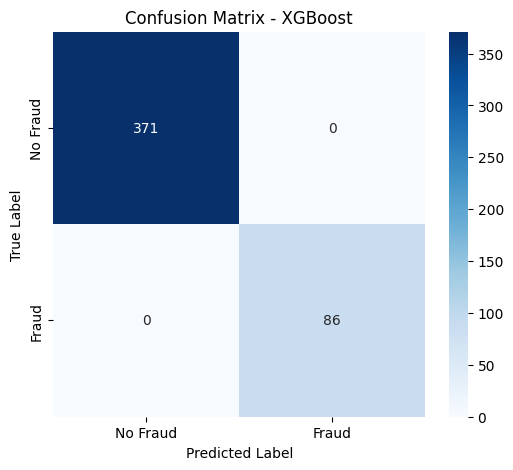

In [13]:
# Evaluasi model xgboost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
print(f"XGBoost - Accuracy: {accuracy_xgb:.4f}")
print(f"XGBoost - F1 Score: {f1_xgb:.4f}")
print(classification_report(y_test, y_pred_xgb))

# Visualisasi Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    xgb_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Training Score", color="blue", marker="o")
plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Validation Score", color="red", marker="o")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.title("Learning Curve - XGBoost")
plt.legend()
plt.grid()
plt.show()

# Visualisasi Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - XGBoost")
plt.show()

SVM - Accuracy: 0.9759
SVM - F1 Score: 0.9399
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       371
           1       0.89      1.00      0.94        86

    accuracy                           0.98       457
   macro avg       0.94      0.99      0.96       457
weighted avg       0.98      0.98      0.98       457



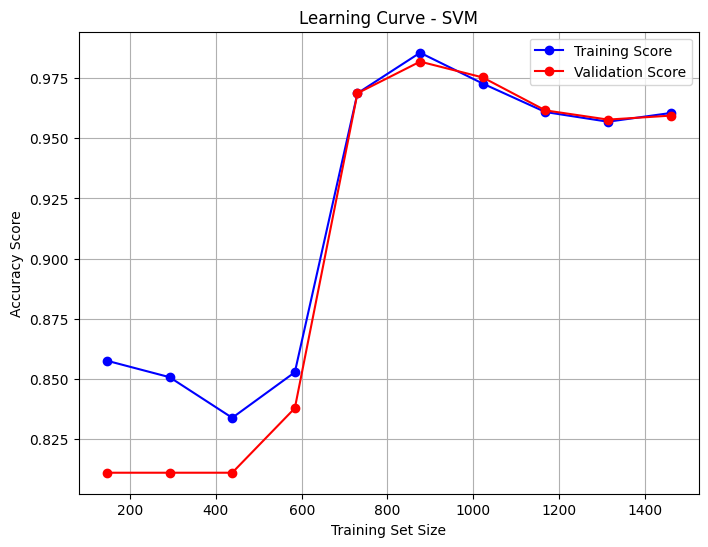

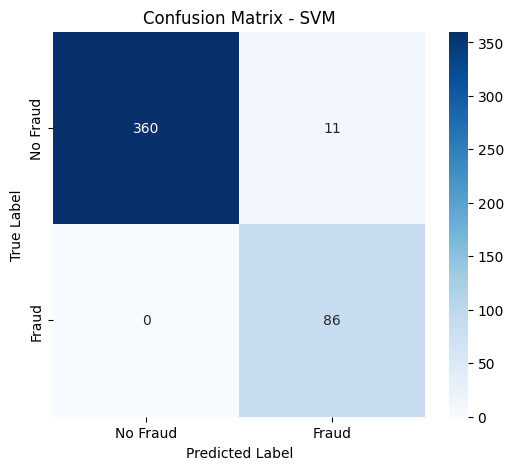

In [14]:
# Evaluasi model svm
accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
print(f"SVM - Accuracy: {accuracy_svm:.4f}")
print(f"SVM - F1 Score: {f1_svm:.4f}")
print(classification_report(y_test, y_pred_svm))

# Visualisasi Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    svm_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Training Score", color="blue", marker="o")
plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Validation Score", color="red", marker="o")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.title("Learning Curve - SVM")
plt.legend()
plt.grid()
plt.show()

# Visualisasi Confusion Matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - SVM")
plt.show()

### Hasil evaluasi dari algoritma Random Forest, XGBoost, dan SVM

1. **Random Forest Classifier**
   
- Akurasi: 100% (1.0000)
- F1-Score: 100% (1.0000)
- Precision & Recall:
  - Kelas 0: Precision = 1.00, Recall = 1.00, F1-Score = 1.00
  - Kelas 1: Precision = 1.00, Recall = 1.00, F1-Score = 1.00
- Kesimpulan: Model Random Forest berhasil mengklasifikasikan semua data dengan sempurna, tanpa kesalahan dalam memprediksi kelas 0 maupun kelas 1.

2. **XGBoost Classifier**
- Akurasi: 100% (1.0000)
- F1-Score: 100% (1.0000)
- Precision & Recall:
  - Kelas 0: Precision = 1.00, Recall = 1.00, F1-Score = 1.00
  - Kelas 1: Precision = 1.00, Recall = 1.00, F1-Score = 1.00
- Kesimpulan: Sama seperti Random Forest, XGBoost juga berhasil melakukan klasifikasi dengan sempurna, mencapai akurasi dan F1-score 100%.

3. **Support Vector Machine (SVM)**
- Akurasi: 97.59% (0.9759)
- F1-Score: 93.99% (0.9399)
- Precision & Recall:
  - Kelas 0: Precision = 1.00, Recall = 0.97, F1-Score = 0.98
  - Kelas 1: Precision = 0.89, Recall = 1.00, F1-Score = 0.94
- Kesimpulan:
  - SVM tidak seakurat Random Forest dan XGBoost, tetapi tetap menunjukkan performa yang baik.
  - Recall kelas 0 lebih rendah dibanding dua model lainnya (0.97 vs 1.00), menunjukkan ada beberapa transaksi non-fraud yang diklasifikasikan sebagai fraud.
  - Precision kelas 1 lebih rendah (0.89 vs 1.00), yang berarti ada beberapa transaksi fraud yang diklasifikasikan sebagai non-fraud.

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

1. Model menggunakan Random Forest, XGBoost dan SVM memperoleh hasil akurasi yang tinggi, bahkan untuk model Random Forest dan XGBoost menghasilkan nilai akurasi yang maksimal yaitu 100%
2. Identifikasi kelemahan model
  - Precision atau Recall untuk model Random Forest dan XGBoost memperoleh hasil maksimal, sedangkan model SVM precison memperoleh 94% dan recall 99%.
  - Untuk kasus ini ketiga algoritma tersebut tidak mengalami overfitting maupun underfitting
  - Untuk kelemahan :
     - Random Forest : Bisa lambat untuk data besar
     - XGBoost : Hyperparameter tuning perlu dioptimalkan
     - SVM : Kurang baik jika dataset besar & kompleks
3. SVM sering kesulitan menangani dataset besar, sehingga performanya bisa lebih rendah dibandingkan model ensemble seperti XGBoost atau Random Forest. Jika Recall untuk kelas "Fraud" rendah untuk ketiga model tersebut, berarti model cenderung mengabaikan transaksi yang sebenarnya fraud.
4. XGBoost dan Random Forest adalah pilihan terbaik karena mencapai akurasi dan F1-score 100%, menunjukkan model sangat baik dalam mendeteksi transaksi fraud maupun non-fraud.
5. SVM memiliki performa yang baik tetapi kurang optimal, dengan akurasi 97.59% dan F1-score 93.99%, yang masih cukup tinggi tetapi tidak sebaik dua model lainnya.
6. Jika ingin memilih satu model terbaik, XGBoost lebih direkomendasikan karena biasanya lebih cepat dan lebih optimal dalam menangani dataset yang besar dibandingkan Random Forest.